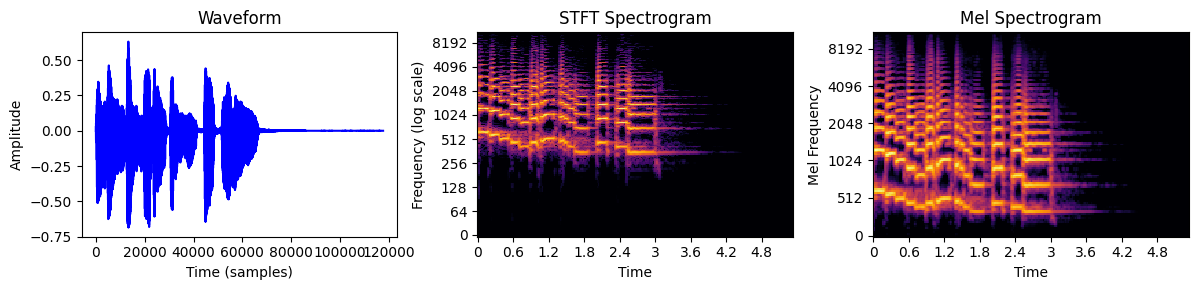

In [29]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# ✅ Load Trumpet WAV File
file_path = librosa.example("trumpet")  # 🎺 Built-in trumpet sound
y, sr = librosa.load(file_path, sr=None)  # Load with original sample rate

n_fft = 2048  # Increase FFT size for better resolution
hop_length = 512  # Hop length to match original signal
win_length = n_fft  # Use same window size

# ✅ Compute STFT Spectrogram
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)  # STFT with phase
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Convert to dB scale

# ✅ Compute Mel Spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB scale


# ✅ Create Side-by-Side Figure
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# 🎵 **Waveform**
axes[0].plot(y, color='b')
axes[0].set_title("Waveform")
axes[0].set_xlabel("Time (samples)")
axes[0].set_ylabel("Amplitude")

# 📊 **STFT Spectrogram**
librosa.display.specshow(D_db, sr=sr, x_axis="time", y_axis="log", cmap="inferno", ax=axes[1])
axes[1].set_title("STFT Spectrogram")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Frequency (log scale)")

# 🔥 **Mel Spectrogram**
librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel", cmap="inferno", ax=axes[2])
axes[2].set_title("Mel Spectrogram")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Mel Frequency")

# ✅ Show All Spectrograms Together
plt.tight_layout()
plt.show()


import librosa
import IPython.display as ipd

# ✅ Load Trumpet WAV File
file_path = librosa.example("trumpet")  # 🎺 Built-in trumpet sound
y, sr = librosa.load(file_path, sr=None)  # Load with original sample rate

# ✅ Play the Audio
ipd.Audio(y, rate=sr)





In [27]:
# ✅ Invert STFT Using Griffin-Lim with More Iterations
D_magnitude = np.abs(D)  # Extract magnitude
reconstructed_waveform = librosa.griffinlim(D_magnitude, hop_length=hop_length, win_length=win_length, n_iter=64)  # More iterations

# ✅ Play the Reconstructed Audio (Jupyter Notebook)
ipd.Audio(reconstructed_waveform, rate=sr)

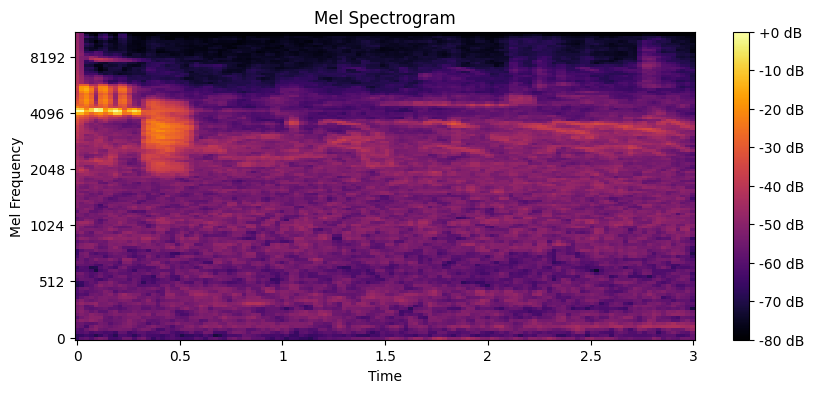

In [30]:
import librosa
import torch
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# ✅ Convert to Normalized Mel Spectrogram
def wav_to_mel_tensor(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Load with original sample rate

    # ✅ Compute Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB scale

    # ✅ Convert to PyTorch Tensor
    mel_tensor = torch.tensor(mel_spec_db, dtype=torch.float32)

    return mel_tensor, sr

mel_tensor, sr = wav_to_mel_tensor("wavfiles/565242-6.wav")
mel_numpy = mel_tensor.numpy()

# ✅ Plot the Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_numpy, sr=sr, x_axis="time", y_axis="mel", cmap="inferno")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()
